In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.56666812],
       [3.38450438]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.56666812],
       [10.33567689]])

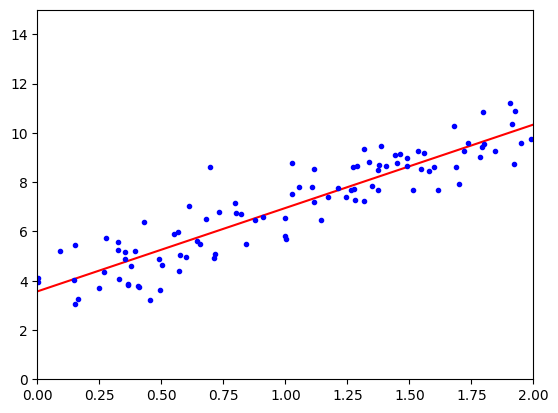

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.56666812]), array([[3.38450438]]))

In [7]:
lin_reg.predict(X_new)


array([[ 3.56666812],
       [10.33567689]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[3.56666812],
       [3.38450438]])

In [9]:
np.linalg.pinv(X_b).dot(y)


array([[3.56666812],
       [3.38450438]])

In [10]:
#GRADIENT DESCENT

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
theta

array([[3.56666812],
       [3.38450438]])

In [12]:
#STOCHASTIC GRADIENT DESCENT

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
     for i in range(m):
         random_index = np.random.randint(m)
         xi = X_b[random_index:random_index+1]
         yi = y[random_index:random_index+1]
         gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
         eta = learning_schedule(epoch * m + i)
         theta = theta - eta * gradients
theta

array([[3.55035659],
       [3.44068102]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


(array([3.5768479]), array([3.38268195]))

In [15]:
#POLYNOMIAL REGRESSION

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([2.10566578])

In [18]:
X_poly[0]


array([2.10566578, 4.43382839])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.02734011]), array([[1.00162553, 0.48866266]]))

In [20]:
#LEARNING CURVES

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


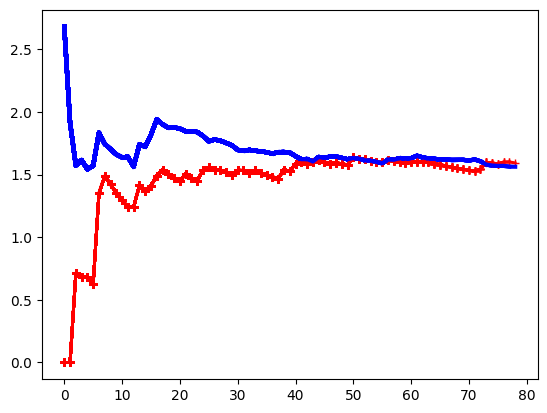

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


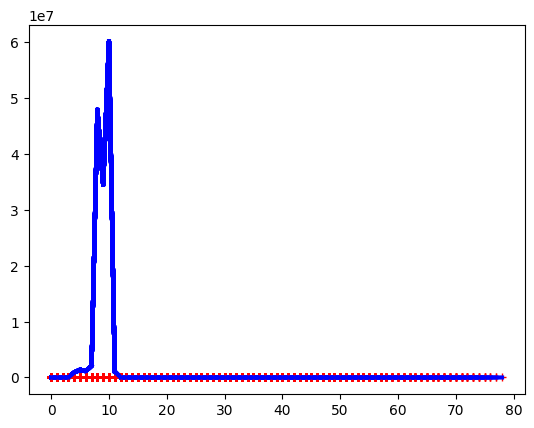

In [23]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)


In [24]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.90068372]])

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.88087942])

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.84892307])

In [28]:
from sklearn.linear_model import ElasticNet
>>> elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
>>> elastic_net.fit(X, y)
>>> elastic_net.predict([[1.5]])


array([4.85231827])

In [38]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
 sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
 y_val_predict = sgd_reg.predict(X_val_poly_scaled)
 val_error = mean_squared_error(y_val, y_val_predict)
 if val_error < minimum_val_error:
     minimum_val_error = val_error
     best_epoch = epoch
     best_model = clone(sgd_reg)


NameError: name 'X_train' is not defined

In [31]:
from sklearn import datasets
>>> iris = datasets.load_iris()
>>> list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [33]:
>>> X = iris["data"][:, 3:] # petal width
>>> y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

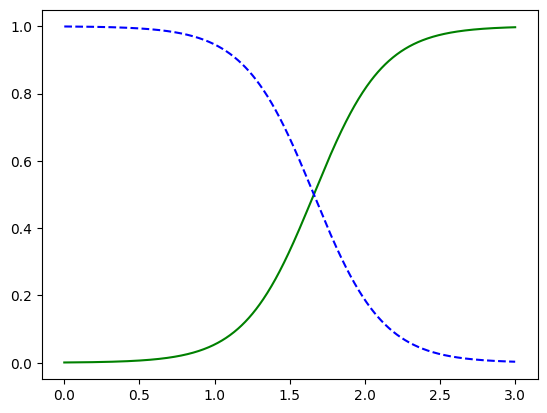

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [36]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

In [41]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([2])

In [42]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])